<h1><center> Lab 2: Electric Forces, Fields, and Potentials </center></h1>

_Names:_

## Computational Labs

Although we use Jupyter for all labs, there are some labs throughout the semester which focus on numerical modeling of physical systems using Python. In today's lab, we will build on last week's lab by adding electric forces to our discussion of electric fields and potentials.

To accomplish this, we will compare the electric force using Coulomb's law to gravity using Newton's law of Gravity. We will also learn to make predictions regarding the motion of a charged particle through an electric potential map.

In [ ]:
#Make sure you run this cell of code, even though you will not see anything change.
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np
from utilities_origin import charge, E_point_charge, E_unit_vector, E_total, plot_electric_potential
from utilities_origin import animate_driver_method, Plot_Arrow, plot_electric_potential_no_arrows
from utilities_origin import html_ipynb_saver
#libraries that we will want to use, with abbreviations to them

Note that the output of the cell is displayed right below the cell. While this is true most of the time, there might be instances in this lab where a cell's code updates something in a previous output, such as when we run animations. You will be informed when you encounter those instances.

You can also press the 'Run' button at the top to 'run' this section of code.  Throughout the lab, you should run all code cells, even if you don't need to change anything within the cell.  This is vital for making sure the code runs properly. 



## Introduction to the Lab
In this lab, we will build further build on our intuition for electrostatics by exploting electric forces in addition to what we studied last week, electric fields and electric potentials. We will compare electric forces with gravitational forces using Coulomb's law and Newton's law of gravity. In our comparison we will see that although these equations are mathematically similar, the scales they operate on are vastly different.

In addition to electric forces, we will study electric potentials by comparing them to topographic maps. We will learn to make predictions on the motion of charged particles when given a potential map.

__For this lab, assume $k=9*10^9 Nm^2C^{-2}$__

### The Culminating Assessment Task

At the end of this notebook, you will undertake what is known as the 'culminating assessment task', which will assess your understanding of the material presented in this lab. 

You will have a randomly generated potential map. You will then need to trace the path of a positively charged particle through the map given a starting position and zero starting velocity. You will be led towards this task through a series of exercises meant to help you draw analogies between the electric force from Coulomb's law:
$$\vec{F_C}=\frac{kQq}{r^2}\hat{r}$$
and Newton's law of Gravitation:
$$\vec{F_G}=\frac{GMm}{r^2}\hat{r}$$
The exercises will build your intuition for understanding how the Electric force works and what one can learn from an equipotential map.<br>

## Part One: Force Balance

To begin our investigation, we will draw on the concept of free-body diagrams, and connect them to the content of 240/241.  We will do this through an investigation of a Force Balance. 

The physical set up that we will be describing is as follows:



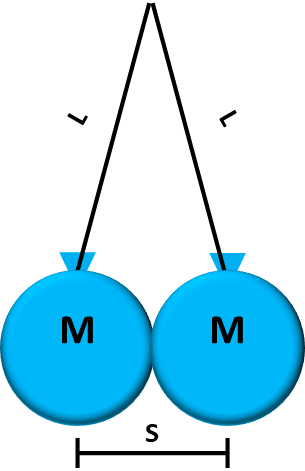

You have two balloons attached to strings of equal length.  These strings are attached to the ceiling. If you were to draw a free-body diagram, you would draw the Gravitational Force straight down, and the Tension Force is pointing along the string from the balloon to the ceiling.  Now, we will be adding electric charge to these balloons.  This is done by rubbing the balloons on something that would leave electric change (a rabbit fur or your hair for example). We will assume that both balloons receive the same amount of charge through this process. When the two balloons separate due to the Electric Force, the system will look like the figure below. Treat $\theta$ as 25 degrees for now. Recall that there are 360 degrees and 2$\pi$ radians in a circle. We can convert from radians to degrees by multiplying 180/$\pi$, or degrees to radians by multiplying $\pi$/180.

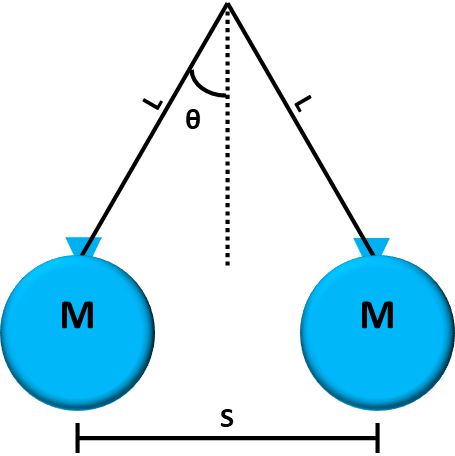

This adds a third force to your free-body diagram.  You should now be thinking of the interactions between the gravitational, tension, and electric forces in the system.  

The cell below is a section of code that can manipulate the base point, magnitude, and direction of an arrow. 


In [ ]:
#the x coordinate for the base point of the arrow
x_base = -1
#the y coordinate for the base point of the arrow
y_base = -1

# magnitude will set the length of the arrow
magnitude = 2 
#angle will set the direction of the arrow. 
#angle of 0 points in the direction of positive x, on the x axis
angle = 0 


#test various sets of magnitudes and angles (for code task 1 below). 
#comment the values in an out as you go.

    ### Edit these lines only for code task 1 below ###

# set 1
#magnitude = 
#angle = 

# set 2
#magnitude = 
#angle = 

# set 3
#magnitude = 
#angle = 

# set 4
#magnitude = 
#angle = 

    ### End edit ###

#converts variables input above into variables wanted for plotting feature 
#notice that we have to convert the angle from degrees to radians 
radangle = angle*np.pi/180

#project the arrow onto the x axis to find the x component (for dx, the argument of the arrow function)
x_length = np.cos(radangle)*magnitude 
#project the arrow onto the y axis to find the y component (for dy, the argument of the arrow function)
y_length = np.sin(radangle)*magnitude  


#Sets the limits of the plot.  Currently set from -2 to 2 in both directions
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xlabel ('x direction')
plt.ylabel ('y direction')

#plt.arrow(x, y, dx, dy) is minimum for this plotting feature
plt.arrow(x_base, y_base, x_length, y_length, head_width=0.05, head_length=0.1, facecolor='k', edgecolor='k')
# head_width, head_length are optional arguments of 
# the plt.arrow function which set length and width of the arrow head.
# facecolor and edge color are optional arguments which set the colors of the arrow.
# in python, 'k' is shorthand for black.


# Above we have 'built' our figure, and now we 'show' our figure. 
# plt.show() shows all figures created by the script

plt.show()

# If we wanted to build a figure, and save it without showing (this is useful in an experimental lab)
# then we would use the command plt.savefig()

<font color=red><strong>Code Task 2.1 : Try playing around with the base point, magnitude, and direction and show at least 4 unique sets of values you have used (comment each set out with the # sign before using a new one so your instructor can see what you have tried). An example of how to do so is shown in the code above.</strong></font> <br><br>

The figure below shows how angles in Python are read. Compare your arrow orientations with the figure as reference. 


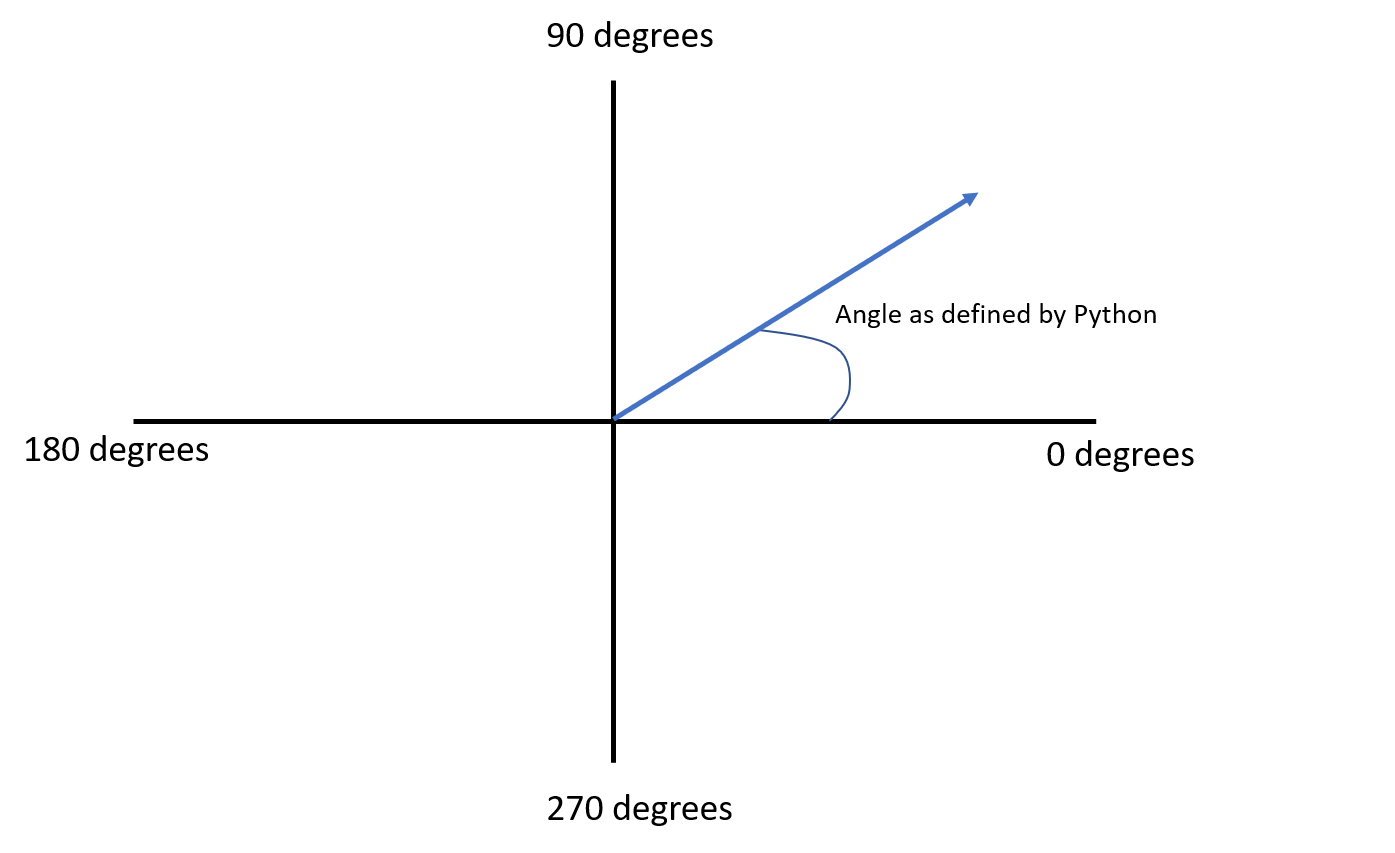



In the cell above we looked at code that allowed us to manipulate direction of an arrow.  If we wanted to sketch a diagram with multiple figures, say a free-body diagram, how should we go about this?  

One way of doing this is by __defining a function, which is a great way to make complex, repetitive code appear more succinct.__


We can name the function however we want (__it has been labeled `Plot_Arrow` in the code below__), and state the variables it needs to function, followed by what will be returned from the function when we call it.  In this case, calling the function will add an arrow to our plot.  Calling this function multiple times allows for multiple arrows to be added to our diagram.

<font color=red><strong>Code Task 2.2 : In the cell below, manipulate the function `Plot_Arrow` to show what the free-body diagram for this set up should look like. Two arrows have already been done for you (you can run the cell to see them), so you'll need to add in 4 more in the space below those two.</strong></font> _Use a magnitude of 1 for this part, since we have not yet calculated the magnitude of the forces for your free-body diagram.  We are also still treating $\theta$ as 25 degrees._



__Hint: You do NOT need to change the angles to radians when using the `Plot_Arrow` function.__

__Hint: If $\theta$ is 25 degrees, what angle should you key into the `Plot_Arrow` function?__

In [ ]:
# initialize a figure, which acts as a canvas for us to plot on
fig = plt.figure(figsize=(8, 5))
# gca stands for 'get plot axes'
# sometimes it is useful to work with the objects in the plot/figure
ax1 = plt.gca()

# Plot_Arrow Calls on a function that was imported from another file  (THESE MAKE THE ARROWS)
# arguments are(base's x-coordinate, base's y-coordinate, length, angle, axes)
# first arrow with at point (1,0), with magnitude 1, poitning in +x direction
Plot_Arrow(1, 0, 1, 0, ax1) 
# second arrow with at point (-1,0) with magnitude 1, pointing in -x direction
Plot_Arrow(-1, 0, 1, 180, ax1)

    ### Edit these lines only for code task 2 ###

#Plot_Arrow()
#Plot_Arrow()
#Plot_Arrow()
#Plot_Arrow()

    ### End edit


#Sets the limits of the plot.  Currently set from -3 to 3 in both directions
plt.xlim(-3,3)
plt.ylim(-3,3)

#Above we have 'built' our figure, and now we 'show' our figure. 
#If we wanted to build a figure, and save it without showing (this is useful in an experimental lab)
#then we would use the command plt.savefig()
plt.show()

Before we use these arrows to draw force diagrams, lets think about the forces in involved in the problem with two balloons.

Gravity always points down and has a magnitude $mg$.

The electric force, in this case, is repulse so on one balloon it points away from the other, with a magnitude $k\frac{qq}{|r|^2}$

**<font color=blue>Problem 2.1: Ignoring signs, what is the magnitude of the x component of the tension in one string?</font>**

_Write your answer here_

**<font color=blue>Problem 2.2: Ignoring signs, what is the magnitude of the y component of the tension in one string?</font>**

_Write your answer here_

### Some notes on plotting

You may notice that we have changed our function slightly below.  Here we will be plotting a little differently.  Before, we had used the pyplot module (used as plt).  This is the lowest level of plotting in the Matplotlib library.  Everything is set as default, and plots things nicely without much input needed.  The next level calls to the specific figure.  In Matplotlib, the figure (generally abbreviated to fig) refers to the actual window/frame.  If you were to run some python code in a Graphic User Interface (GUI) that opens new windows for your figures, each figure would open as a new window.  The third level of plotting uses axes.  It is important to distinguish between commands for axes and axis.  Axis refers to the x/y/z axis of the graph, where you can have axis labels.  Axes however breaks your figure into multiple subplots, which is often abbreviated to ax.  This is a convenient way to plot two sets of data next to each other, but in separate graphs.  __Python indices begin at 0, so the first axes we call on is ax[0].__  We have utilized this functionality to plot the free-body diagrams of the two masses side-by-side.  Had we just plotted everything in one axes, the magnitude of the forces would be too small compared to the distance seperating the balloon masses to give any insight into these forces. <br> 


You have been given the set up with the Gravitational Force vectors with their magnitude already correct, and the correct Gravitational and Electric Force equations.  

<font color=red>__Code Task 2.3a : Input a valid EQUATION for the magnitude of the Tension Force at the line indicated by the edit comments.__</font>.  This now allows you to __add the vectors for both masses for the Electric Force and the Tension Force__.<br>

<br>

<font color=red>__Code Task 2.3b : In the cell below, manipulate the function to add in all the force vectors at the position indicated by the second arrow.__</font>

__Note: When using angles, verify whether you should be in radians/degrees, and check against what you are using.__

In [ ]:
# define gravitational acceleration in m/s^2
g=9.8 

# define electric constant in N m^2/C^2 
k=9e9 

#mass of single balloon in g
mgrams=1.2 
#mass converted to kg
m = mgrams/1000 
 #seperation in m
s=1.0
#length of string in m
l=1.0 

#calculate the angle between the string and the y direction.  
theta=np.arcsin((s/2)/l)*(180/np.pi) 
#Half the angle between the two strings
#Not the same as the deflection for the direction of the arrow for the force

# using electric constant and gravitational force, 
# we calculate the magnitude of the charge needed to balance at the separation s
# and length l we defined above
qsquared = ((m*g*s*s)/k)*np.tan(theta*(np.pi/180))
q=np.sqrt(qsquared)

#calculates the magnitude of the three forces
force_g = m*g
force_e = k*q*q/(s*s)

    ### Begin Edit ###
    
    # use your response from questions 2.1 and 2.2 to find the magnitude of the tension force
force_t = # input the correct equation   
    #uncomment the print statement, the third of five, once you have input the expression
    
    ### End Edit ###


print('{}{:1.3f}{}'.format('Force of gravity has a magnitude of ',force_g,'N'))
print('{}{:1.3f}{}'.format('Force of electrostatic repulsion has a magnitude of ',force_e,'N'))
# uncomment this line once you have finished writing the magnitude of the tension
#print('{}{:1.3f}{}'.format('Force of tension has a magnitude of ',force_t,'N'))
print('{}{:1.9f}{}'.format('The charge on each balloon is ',q,'C'))
print('{}{:1.3f}{}'.format('The angle theta is ',theta,' degrees'))

#sets the figure to have two subplots
fig, ax2 = plt.subplots(1,2, sharey=True)

#Calls on the function that we created earlier to plot each force vector (ADD THEM BELOW)
#Plot_Arrow(xend, yend, magnitude, angle from zero, axes number)

#these are arrows for gravity
Plot_Arrow(-s/2,0,force_g,270,ax2,axesnum=0)
Plot_Arrow(s/2,0,force_g,270,ax2,axesnum=1) 

    ### Begin Edit ###
    
# Fill in these arrows with the appropriate expressions to create your force diagrams.
# Uncomment and run the code when you finish to produce your force diagrams
# remember to remove the '**' when you edit a variable below


## Electric Forces##
# Fill in the **variables** for the electric force on the left balloon
#Plot_Arrow(**arrow base x**, **arrow base y**, **arrow magnitude**, **arrow direction, in degrees**, ax2,axesnum=0)

# Fill in the **variables** for the electric force on the right balloon
#Plot_Arrow(**arrow base x**, **arrow base y**, **arrow magnitude**, **arrow direction, in degrees**, ax2,axesnum=1)

##Tension Forces##
# Fill in the **variables** for the tension on the left balloon
#Plot_Arrow(**arrow base x**, **arrow base y**, **arrow magnitude**, **arrow direction, in degrees**, ax2,axesnum=0)

# Fill in the **variables** for the tension force on the right balloon
#Plot_Arrow(**arrow base x**, **arrow base y**, **arrow magnitude**, **arrow direction, in degrees**, ax2,axesnum=1)

    ### End Edit ###


#Adds a red square for mass
ax2[0].plot(-s/2,0,'rs')
ax2[1].plot(s/2,0,'rs')

ax2[0].set_xlim(-s/2-0.02,-s/2+0.02)
ax2[0].set_ylim(-0.02,0.02)
ax2[1].set_xlim(s/2-0.02,s/2+0.02)
ax2[1].set_ylim(-0.02,0.02)

#sets each subplot's title to the string input            
ax2[0].set_title('Left balloon, axesnum = 0')
ax2[1].set_title('Right balloon, axesnum = 1')

#turns the x and y labels off
ax2[0].tick_params(axis='x',labelbottom='off') 
ax2[0].tick_params(axis='y',labelleft='off') 
ax2[1].tick_params(axis='x',labelbottom='off') 
ax2[1].tick_params(axis='y',labelleft='off') 

#Above we have 'built' our figure, and now we 'show' our figure. 
#If we wanted to build a figure, and save it without showing (this is useful in an experimental lab)
#then we would use the command plt.savefig()
plt.show()

For possible colors you could use, see: https://matplotlib.org/api/colors_api.html<br>
For shapes of markers you could use, see: https://matplotlib.org/api/markers_api.html#module-matplotlib.markers

__<font color = orange> CHECK! <br>
The code above prints out the value for the angle $\theta$ and the charge. Check if your calculated values in Problem 2.2 matches what the code calculates.__

_Optional_ : If you finish the lab early, you could come back to this code and investigate what happens if the balloons do not have the same charge (the system is not fully symmetric).  How would you go about doing this?  <br>


## Part Two: Orbital Motion and Coulomb's Law

In this section, you'll continue your exploration with electric fields and potentials. In the previous lab, you were introduced to field lines and equipotentials and how one can map them using a Voltmeter. Today, you'll be exploring what the field lines and equipotential lines tell you about the behavior of a positive/negative charge placed within the field. For this part of the lab, you are going to be exploring just how similar Coulomb's law and Newton's law of Gravitation is. 

The cell below contains the _update function_. It updates a particle's position and velocity given the forces acting on it. <font color = red>__Run it without editing.__</font>

In [ ]:
def update_function(particle, charges, dt):
    v_init = particle.velocity
    mass = particle.M
    k1 = np.array(E_total(particle.position[0], particle.position[1], charges))*particle.q/mass
    k2 = np.array(E_total(particle.position[0] + (dt/2.0)*v_init[0] + (np.power(dt,2.0)/8)*k1[0], particle.position[1]+ (dt/2.0)*v_init[1] + (np.power(dt,2.0)/8)*k1[1], charges))*particle.q/mass
    k4 = np.array(E_total(particle.position[0] + dt*v_init[0] + (np.power(dt,2.0)/2)*k2[0], particle.position[1] + dt*v_init[1] + (np.power(dt,2.0)/2)*k2[1], charges))*particle.q/mass

    x_new = particle.position + dt*particle.velocity + (np.power(dt,2.0)/6)*(k1 + 2.0*k2)
    v_new = particle.velocity + (dt/6.0)*(k1 + 4.0*k2 + k4)
    particle.update_velocity(v_new)                               
    particle.update_position(x_new)                               #updates the relevant quantities for the particle
    particle.update_time(dt) 

    #1.67e-27 - mass proton in kg

<font color=red>**Run the code below, without editing**.</font> You'll see a <font color=blue>negative charge</font> appear at the coordinates **x=0, y=2**. We are going to call this negative charge our 'planet', with the assumption that it is too massive to be moved by any force acting on it. You will also see a <font color=red>positive charge</font> appearing below our planet at coordinates __x=0, y=0.__ This is our 'satellite'. Note the initial velocity, named 'vel_init' in the code below. 

In [ ]:
####### Establish position of massive negative charge (the planet) #########################################

q_big=-5e-9                               #charge of 'massive planet' negative charge
pos_big=np.array([0,2])                   #position of planet charge ([X,Y])
C_planet=charge(q=q_big,position=pos_big) #creating the charge using the 'charge' class

######################## Make E potential #############################################

#These four numbers define the starting and ending points on the grid
x_min=-5
x_max=5
y_min=-5
y_max=5

planet_charge=[C_planet] #All this does is put our charge object into a 1-item list, as that is required by the function below
plot_electric_potential(x_min,x_max,y_min,y_max,planet_charge)

########## Initialize position of test charge (the satellite) #########################

q_small=1e-9                                                                      #charge of 'satellite' positive charge
pos_small_init=np.array([0,0])                                                    #position of 'satellite' charge
vel_init=np.array([1,0])                                                          #initial velocity of 'satellite' charge
mass_small=1e-9                                                                   #mass of 'satellite' charge
C_satellite=charge(q=q_small,position=pos_small_init,mass=mass_small,velocity=vel_init) #create the charge using the 'charge' class
ax=plt.gca()          #gca='graph current axes'. This gives us a handle to refer to later when we want to add additional plots
fig=plt.gcf()       #gcf='graph current figure'. This gives us a handle to refer to later when we want to refer to this figure.
ax.scatter(pos_small_init[0],pos_small_init[1],color='r')       #Adds a red dot to indicate the position of the positive charge

The code in the cell below runs an animation in the figure above. <font color=red>__Run it and see what happens to our satellite__</font>.

_**__Note: To stop the animation, click the blue power button that appears on the top right of the figure.__**_

In [ ]:
################################################# Animation Cell ###############################################################
dt=0.01                            #time step
trange=np.arange(0,10,0.2)
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
delta_val = 1.0e-3
particle_in_figure_handle, = ax.plot([C_satellite.position[0]], [C_satellite.position[1]], 'o-', linewidth=2.0, ms=2, color='tab:orange', markerfacecoloralt='lightgreen')
particle_ani = animation.FuncAnimation(fig, animate_driver_method, 25, fargs=(C_satellite, particle_in_figure_handle, update_function, planet_charge, dt, time_text), interval=25)

The animation function is too complex to explain using comments. Check out https://matplotlib.org/api/animation_api.html to learn more and also see some really cool examples.<br>

**<font color=blue>Problem 2.3 : What happens to the satellite charge when it gets close to the 'planet'? How would you explain this observation? (Hint: Think of the Coulomb's law equation)**

_Write your answer here_

Now we're going to see if we can put that satellite charge in circular motion. 

**<font color=blue>Problem 2.4 : Work out the initial velocity required for circular motion**</font><br>
You can use the calculation cell below to help you out, and also as a way to get comfortable with coding in Matplotlib and the Jupyter notebook. Feel free to use the paper provided to do any necessary calculations as well.

In [ ]:
############################################### Calculation Cell ###############################################################
k_cons=9e9 # Use this value of k in your calculations 
r_initial=pos_small_init-C_planet.position
print('Initial displacement of "satellite" from "planet" is ',r_initial)
r_mag=np.linalg.norm(r_initial)                                         #This is your orbit radius
print('Initial distance of "satellite" from "planet" is ',r_mag)

    ### Begin Edit ###
    
# In this next line, type the equation to find the speed needed to stay in a circular orbit.
# Uncomment the line with `my_speed_init` once you have solved for the speed

#my_speed_init = 

# After solving for the speed, uncomment these three lines to print out the values you found and to find the velocity

#print('Hence, our initial "satellite" speed needs to be ',my_speed_init)
#my_v_init=np.array([my_speed_init,0])
#print('Hence, our initial velocity needs to be ',my_v_init)

    ### End Edit ###

If you wish to work out the speed required on paper, use the following quantities:

Mass of satellite charge = $1 \times 10^{-9}$ kg

Charge of satellite = $1 \times 10^{-9}$ C

Charge of planet = $-5 \times 10^{-9}$ C

Separation of satellite and planet = 2 m

Now, <font color=red><strong>use the velocity you just calculated in the code cell below. Recall that circular motion is a special case, and the value must be precise otherwise the orbit will not be circular.</strong></font>. A new figure will be created.

In [ ]:
####### Establish position of massive negative charge (the planet) #########################################
q_big=-5e-9 #charge of 'massive' negative charge
pos_big=np.array([0,2])
C_planet=charge(q=q_big,position=pos_big)

######################## Make E potential #############################################
x0=-5
x1=5
y0=-5
y1=5
planet_charge=[C_planet]
plot_electric_potential(x0,x1,y0,y1,planet_charge)

########## Initialize position of test charge (the satellite) #########################
q_small=1e-9
pos_small_init=np.array([0,0]) 

#this lines has the velocity we calcaulated before, so it will not run until you have found `my_speed_init`
vel_init=my_v_init

C_satellite=charge(q=q_small,position=pos_small_init,mass=1e-9,velocity=vel_init)
ax=plt.gca()
fig=plt.gcf()
ax.scatter(pos_small_init[0],pos_small_init[1],color='r')

<font color=red>__Run the animation cell below__</font>

In [ ]:
################################################# Animation Cell ###############################################################
dt=0.01
trange=np.arange(0,10,0.2)
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
delta_val = 1.0e-3
particle_in_figure_handle, = ax.plot([C_satellite.position[0]], [C_satellite.position[1]], 'o-', linewidth=2.0, ms=2, color='tab:orange', markerfacecoloralt='lightgreen')
particle_ani = animation.FuncAnimation(fig, animate_driver_method, 25, fargs=(C_satellite, particle_in_figure_handle, update_function, planet_charge, dt, time_text), interval=25)

Did you manage to get the satellite into circular motion? If so, nice work! Otherwise, check your calculations and try again. You can do it!<br>
<font color=blue>__Problem 2.5 : Once you've obtained circular motion , turn your attention to the equipotential lines and electric field arrows. Use them to explain the circular motion of the satellite.__</font> Here are some guiding questions to help you out:
<br>
* Is there any transformation of energy in circular motion? (i.e. from potential energy to kinetic energy and vice versa)<br> 
* Which way are the Electric Field arrows pointing? What does this tell you about the force acting on the satellite?<br>
* What do the equipotential lines tell you?
<br>

Feel free to do some internet searching if you need a reminder of some concepts!

_Write your answer here_

Real satellite orbits are never circular. A circular orbit is really a special case of an elliptical orbit. There are also other types of orbits such as parabolic orbits and hyperbolic orbits.<br>
Now's your chance to play around and explore.<br>
<font color=red>__Code Task 2.4 : In the code below, define your own starting point and initial velocity for the satellite charge and run the animation cell afterwards.__ </font>While it's up to you to decide what numbers you want to use, do pay attention to the animation that runs afterwards and see what strikes your attention.

In [ ]:
################################################ SANDBOX AREA ##########################################################
####### Establish position of massive negative charge (the planet) #########################################
q_big=-15e-9 #charge of 'massive' negative charge
pos_big=np.array([1,2])
C_planet=charge(q=q_big,position=pos_big)

######################## Make E potential #############################################
x0=-5
x1=5
y0=-5
y1=5
planet_charge=[C_planet]
plot_electric_potential(x0,x1,y0,y1,planet_charge)

########## Initialize position of test charge (the satellite) #########################
q_small=1e-9

    ### Begin Edit ###
    
#Edit and uncomment these four variables to define your own starting point and initial velocity

# the x component of the position vector 
#this_x_position =
# the y component of the position vector
#this_y_position = 
# the x component of the velocity vector
#this_x_velocity = 
# the y component of the velocity vector
#this_y_velocity =

    ### End Edit ###

#use the values you defined for the vectors
pos_small_init=np.array([this_x_position,this_y_position])
vel_init=np.array([this_x_velocity,this_y_velocity]) 



C_satellite=charge(q=q_small,position=pos_small_init,mass=1e-9,velocity=vel_init)
ax=plt.gca()
fig=plt.gcf()
ax.scatter(pos_small_init[0],pos_small_init[1],color='r')
# run 'animation cell' once figure has been created to see how the positive charge behaves with your input values of initial velocity

**When you feel that you've run the simulation long enough, you can click the blue power symbol in the upper-right corner of the plot, to stop it.**

In [ ]:
################################################# Animation Cell ###############################################################
dt=0.01
trange=np.arange(0,10,0.2)
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
delta_val = 1.0e-3
particle_in_figure_handle, = ax.plot([C_satellite.position[0]], [C_satellite.position[1]], 'o-', linewidth=2.0, ms=2, color='tab:orange', markerfacecoloralt='lightgreen')
particle_ani = animation.FuncAnimation(fig, animate_driver_method, 25, fargs=(C_satellite, particle_in_figure_handle, update_function, planet_charge, dt, time_text), interval=25)

<font color=blue>__Problem 2.6 : Once you have obtained a good* orbit, describe below any interesting features that you have observed.__</font> Here are some guiding questions to help you out:
<br>
* How would you describe the shape of the orbit? This link might help you:https://history.nasa.gov/conghand/traject.htm<br>
* Where does the satellite move the fastest?<br>
* Can you use the electric field and equipotential lines to explain the behavior of the satellite?<br><br>
*A good orbit is one with no strange or unphysical behavior, e.g. flying away in a straight line or falling inward then flying out in a chaotic direction

_Write your answer here_

## Cumulative Assessment Task : Electric Topography

A topographic map is a map that also includes information about height/depth; specifically, it uses contour lines to trace out the height (usually above sea level) of a region. Consider the example below, which shows both a topographic map and the mountainous terrain that it represents. 

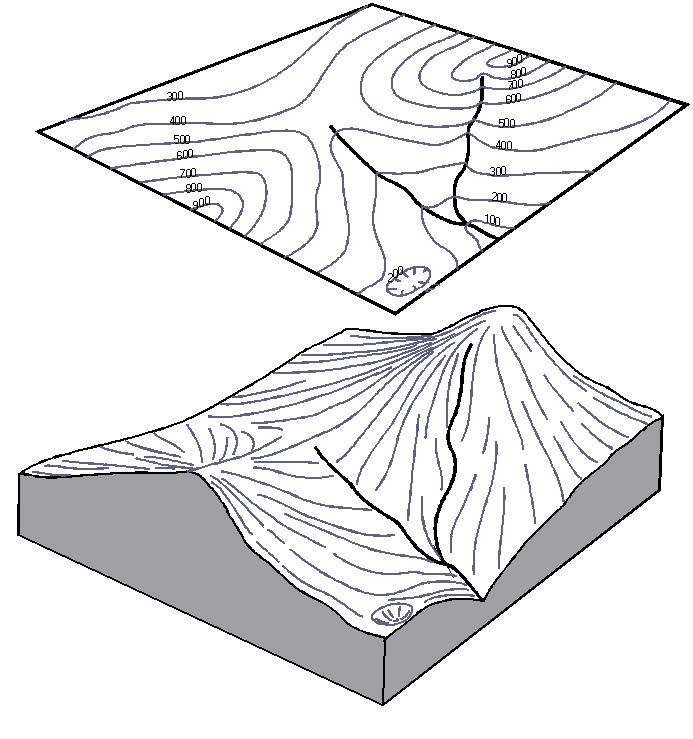

Think back to first semester physics, where you talked about the idea of gravitational potential energy. 

<font color=blue>__Problem 2.7: What does Gravitational Potential Energy depend on? What variables are important? How is this represented on the contour map?__</font> 

_Write your answer here_

<font color=blue>__Problem 2.8: If you were to drop a large marble onto a region somewhere on the mountainous terrain, could you determine the trajectory of the marble just using the topographic map? If so, how would you do it? If not, why?__</font>

_Write your answer here_

Let’s bring things back to Electric charge. The following code creates an Electrical topography map. The code places three charges, of random magnitude and sign, randomly on the map, and creates a corresponding topographic map. 

__Run the code below to generate a potential map__. 

In [ ]:
q_e = 1.6e-19

charges=[]
# # The following code generates random positions and charge values, and generates charge objects for those 
# # random values. It then plots the random charge values as a potential map.

x_min=-25.0
x_max=25.1
y_min=-25.0
y_max=24.8

charge_num = 3
max_charge_value = 4

x_values = np.random.random(charge_num)*(x_max-x_min) + x_min
y_values = np.random.random(charge_num)*(y_max-y_min) + y_min
charge_val = np.random.randint(-1.0*max_charge_value, high=max_charge_value,size=charge_num)
charge_val = charge_val[charge_val != 0]

for jj in range(len(charge_val)):
    charges.append(charge(position=np.array([x_values[jj],y_values[jj]]),q=charge_val[jj]*q_e))

plot_electric_potential_no_arrows(x_min, x_max, y_min, y_max, charges)

## _**NOTE: If you stop the plot above (either on accident or on purpose) there is a copy of it saved to the folder containing this notebook (if you click the finder, it should already be pulled up). Feel free to take a picture of it with your phone.**_


<font color=blue>**Problem 2.9 : Say you place a test charge with a net charge of $-e$ at the point (0,0). Using just the information from the topographic map, what, if anything, can you say about the motion of the charge after it is released? How can you make these determinations using the topographic map (i.e. describe how you interpret the map)? Some things to include when writing your response:**
<br>

- **How are Gravitational Potential Energy and Electric Potential Energy similar to one another? How are they different?**<br>
- **How are the contour lines related to the Electric Field?**<br>
</font>

_Write your answer here_

### Building Things for the Next Generation

We have provided you with a map of charges generated by your predecessors in the previous semester, and asked you to find the path a particle would take if it were dropped in a certain location. But what if, instead, _you_ were to design a map of charges? Well that's exactly what we want you to do!

<font color=red> __Code Task 2.5 : Specifically, we want you to come up with a map of up to 3 charges that _next_ semester will use__</font>. You can make it as easy (or hard) as you like, but you should use not more than 3 charges. Specify a starting location, and also specify where the charge will end up (if it's off the map, specify the position that it exited at). __For your starting position, make sure a positive test charge would cover at least half the map's length/width before exiting.__

To create your potential map, you would need to input specific x and y positions pertaining to the charges' location on a grid. Maximum and minimum x and y values have been given to you, so your positions can be anywhere within this range. In addition, you would also need to input your charge values. The code in the cell below will automatically multiply your charge values by the electron charge. 

<font color=orange> Please also note that you would need an equal number of inputs for your x coordinates, y coordinates and charge values</font>.

In [ ]:
q_e = 1.6e-19 # electron charge 

charges=[]

x_min=-25.0 # minimum x-value
x_max=25.1 # maximum x-value
y_min=-25.0 # minimum y-value
y_max=24.8 # maximum y-value

    ### Begin Edit ###

#Input your charge positions and values below
#input three random x coordinates, between -25 and 25.1
x_values = [?,?,?]
#input three random y coordinates, between -25 and 24.8
y_values = [?,?,?]
#input three random charge values, numbers order 1 between -4 and 4
charge_val = [?,?,?] 

charge_num = np.size(x_values)

for jj in range(charge_num):
    charges.append(charge(position=np.array([x_values[jj],y_values[jj]]),q=charge_val[jj]*q_e))

plot_electric_potential_no_arrows(x_min, x_max, y_min, y_max, charges)

<font color=blue>__Problem  2.10: What starting position do you choose?__

_Write your answer here_

<font color=blue>__Problem 2.11 : Where does your positive test charge end up/exit the map based on your chosen starting position?__

_Write your answer here_

# Review

<!-- ans1 -->

<font color = blue>__Problem 2.12: A positive test charge is moving from rest, starting near a positively charged electrode to a negatively charged one. Where would it have the highest potential energy? Where would it have the highest kinetic energy? Recall that we take the convention that potential energy is defined by the work required to place a _positive_ charge in a field.__</font>

_Write your answer here_

<font color = blue>__Problem 2.13: Under what conditions do the electric field lines actually represent the direction of charge movement?__

_Write your answer here_

### <center>You're done! Submit your lab per the following instructions.<font color=white><#!S!#>

* Save this file with the lab number and group number to submit to canvas, e.g. `group01_lab02.ipynb`. 
* You only need to submit one file as a group to the canvas assignment and it will count for all group members.
* The group recorder should still send the worksheet to their group members so they have a copy.
* Save the file as a html file. You can do this by opening the `File` tab on the top left corner of Jupyter, then select `Download as > html (.html)`
* Submit both the .ipynb and .html files to canvas under the `Lab 2: Electric Fields Computational Lab` assignment.